# Assignment: Week 2 - Goal search

## Getting Git
Throughout this course we will make use of the [aima-python project on Github](https://github.com/aimacode/aima-python).  This is an active opensource development effort with many contributors including atleast one of the text authors. 

To get the code you will need to get a copy of it.  This is commonly referred to as "cloning" a repository and you can find directions how to do it [here](https://help.github.com/articles/cloning-a-repository/).  Git is what is called version control software and is used to power the web-site GitHub.  You can interact with GitHub simply through your web browser, or by using client software.  I recommend sooner but the choice is up to you.  If you are using Linux or macOS, then you probably already have Git installed.  Enter `which git` at the command line, you will either see a path or `command not found`.  These lists of clients will provide you plenty of options to choose from:

* [Command-line clients](https://git-scm.com/book/en/v2/Getting-Started-Installing-Git)
* [GUI clients](https://git-scm.com/downloads/guis)

**If you are new to Git -- that is awesome -- you will learn some Git basics that will help prepare you for working as a data scientist.  You do not need to know Git or anything but a novice user in this course.**   

## Cloing the repo
To get a copy of all the code in the repository, you need to `clone` it.  This simply means "copy it" and allows you to interact with others in the development of open source software.  The aima-python repository can be found at [github.com/aimacode/aima-python](https://github.com/aimacode/aima-python).  To clone simply enter `git clone https://github.com/aimacode/aima-python` from the command line.  Git will create a `aima-python` folder in whatever directory you ran the command from.  If you are using a GUI, find clone and provide it with `https://github.com/aimacode/aima-python`.   Once the command runs you should have the code downloaded.  Don't worry, you can delete this folder and repeat the process again and again.  

## Plan B

Alternatively, github allows you to download a zip file of the repository.  This method is easy, but you are missing out in learning an essential skill that is required of most working data scientists.

## Preparing to work on this assignment

To complete this assignment here are the steps you will need to complete: 

1. Download and copy this assignment into your repository

2. Start Jupyter and navigate to the repository

3. Start Jupyter in that directory 

## Assuring the correct working directory

 You will need to enter the directory where you the aima-python code.  _You will need to update the location of aima-python on your system._

In [1]:
# jupyter started here
%pwd

'/Users/rob/Documents/GitHub/ai-course/assignments'

In [2]:
# move to the aima-python directory on your system
%cd /Users/rob/Documents/GitHub/aima-python

/Users/rob/Documents/GitHub/aima-python


In [3]:
# You should now be in the repository
%pwd

'/Users/rob/Documents/GitHub/aima-python'

Note: aima-python is _not_ a python package which means that you cannot conda or pip install it.  That is why you need to be in the repository in order to make use of repositories' code.  

## Importing the needed packages

In [4]:
from search import *
from notebook import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens

# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [5]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import lines

from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import time

## PROBLEM

Let's see how we define a Problem. Run the next cell to see how abstract class `Problem` is defined in the search module.

In [12]:
psource(Problem)

The `Problem` class has six methods.

* `__init__(self, initial, goal)` : This is what is called a `constructor`. It is the first method called when you create an instance of the class as `Problem(initial, goal)`. The variable `initial` specifies the initial state $s_0$ of the search problem. It represents the beginning state. From here, our agent begins its task of exploration to find the goal state(s) which is given in the `goal` parameter.


* `actions(self, state)` : This method returns all the possible actions agent can execute in the given state `state`.


* `result(self, state, action)` : This returns the resulting state if action `action` is taken in the state `state`. This `Problem` class only deals with deterministic outcomes. So we know for sure what every action in a state would result to.


* `goal_test(self, state)` : Return a boolean for a given state - `True` if it is a goal state, else `False`.


* `path_cost(self, c, state1, action, state2)` : Return the cost of the path that arrives at `state2` as a result of taking `action` from `state1`, assuming total cost of `c` to get up to `state1`.


* `value(self, state)` : This acts as a bit of extra information in problems where we try to optimise a value when we cannot do a goal test.

## NODE

Let's see how we define a Node. Run the next cell to see how abstract class `Node` is defined in the search module.

In [13]:
psource(Node)

The `Node` class has nine methods. The first is the `__init__` method.

* `__init__(self, state, parent, action, path_cost)` : This method creates a node. `parent` represents the node that this is a successor of and `action` is the action required to get from the parent node to this node. `path_cost` is the cost to reach current node from parent node.

The next 4 methods are specific `Node`-related functions.

* `expand(self, problem)` : This method lists all the neighbouring(reachable in one step) nodes of current node. 

* `child_node(self, problem, action)` : Given an `action`, this method returns the immediate neighbour that can be reached with that `action`.

* `solution(self)` : This returns the sequence of actions required to reach this node from the root node. 

* `path(self)` : This returns a list of all the nodes that lies in the path from the root to this node.

The remaining 4 methods override standards Python functionality for representing an object as a string, the less-than ($<$) operator, the equal-to ($=$) operator, and the `hash` function.

* `__repr__(self)` : This returns the state of this node.

* `__lt__(self, node)` : Given a `node`, this method returns `True` if the state of current node is less than the state of the `node`. Otherwise it returns `False`.

* `__eq__(self, other)` : This method returns `True` if the state of current node is equal to the other node. Else it returns `False`.

* `__hash__(self)` : This returns the hash of the state of current node.

We will use the abstract class `Problem` to define our real **problem** named `GraphProblem`. You can see how we define `GraphProblem` by running the next cell.

In [14]:
psource(GraphProblem)

Have a look at our romania_map, which is an Undirected Graph containing a dict of nodes as keys and neighbours as values.

## Defining the graph

We are going to be using search to find routes between locations on a map.  Our text has choosen Romania and we will follow that example for now so that you can compare the results you get here with those in the book.  With apologies to Romanians everywhere, I am shortening the town names to a single letter.  

Later you will be applying this knowledge to route finding between major American cities.  But before we can do any of that, we first need something to search, an acyclic graph does the job nicely.  

In [11]:
romania_map = UndirectedGraph(dict(
    A=dict(Z=75, S=140, T=118),
    B=dict(U=85, P=101, G=90, F=211),
    C=dict(D=120, R=146, P=138),
    D=dict(M=75),
    E=dict(H=86),
    F=dict(S=99),
    H=dict(U=98),
    I=dict(V=92, N=87),
    L=dict(T=111, M=70),
    O=dict(Z=71, S=151),
    P=dict(R=97),
    R=dict(S=80),
    U=dict(V=142)))

romania_map.locations = dict(
    A=(91, 492), B=(400, 327), C=(253, 288),
    D=(165, 299), E=(562, 293), F=(305, 449),
    G=(375, 270), H=(534, 350), I=(473, 506),
    L=(165, 379), M=(168, 339), N=(406, 537),
    O=(131, 571), P=(320, 368), R=(233, 410),
    S=(207, 457), T=(94, 410), U=(456, 350),
    V=(509, 444), Z=(108, 531))

It is pretty straightforward to understand this `romania_map`. The first node **A** has three neighbours named **Z**, **S**, **T**. Each of these nodes are 75, 140, 118 units apart from **A** respectively. And the same goes with other nodes.

And `romania_map.locations` contains the positions of each of the nodes. We will use the straight line distance (which is different from the one provided in `romania_map`) between two cities in algorithms like A\*-search and Recursive Best First Search.

**Define a problem:**
Now it's time to define our problem. We will define it by passing `initial`, `goal`, `graph` to `GraphProblem`. So, our problem is to find the goal state starting from the given initial state on the provided graph. 

Say we want to start exploring from **A** and try to find **B** in our romania_map. So, this is how we do it.

In [12]:
romania_problem = GraphProblem('A', 'B', romania_map)

### Romania Map Visualisation

Let's have a visualisation of Romania map [Figure 3.2] from the book and see how different searching algorithms perform / how frontier expands in each search algorithm for a simple problem named `romania_problem`.

Have a look at `romania_locations`. It is a dictionary defined in search module. We will use these location values to draw the romania graph using **networkx**.

In [13]:
romania_locations = romania_map.locations
print(romania_locations)

{'A': (91, 492), 'B': (400, 327), 'C': (253, 288), 'D': (165, 299), 'E': (562, 293), 'F': (305, 449), 'G': (375, 270), 'H': (534, 350), 'I': (473, 506), 'L': (165, 379), 'M': (168, 339), 'N': (406, 537), 'O': (131, 571), 'P': (320, 368), 'R': (233, 410), 'S': (207, 457), 'T': (94, 410), 'U': (456, 350), 'V': (509, 444), 'Z': (108, 531)}


Let's get started by initializing an empty graph. We will add nodes, place the nodes in their location as shown in the book, add edges to the graph.

In [14]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in romania_map.locations.keys()}
node_positions = romania_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in romania_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

romania_graph_data = {  'graph_dict' : romania_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

We have completed building our graph based on romania_map and its locations. It's time to display it here in the notebook. This function `show_map(node_colors)` helps us do that. We will be calling this function later on to display the map at each and every interval step while searching, using variety of algorithms from the book.

We can simply call the function with node_colors dictionary object to display it.

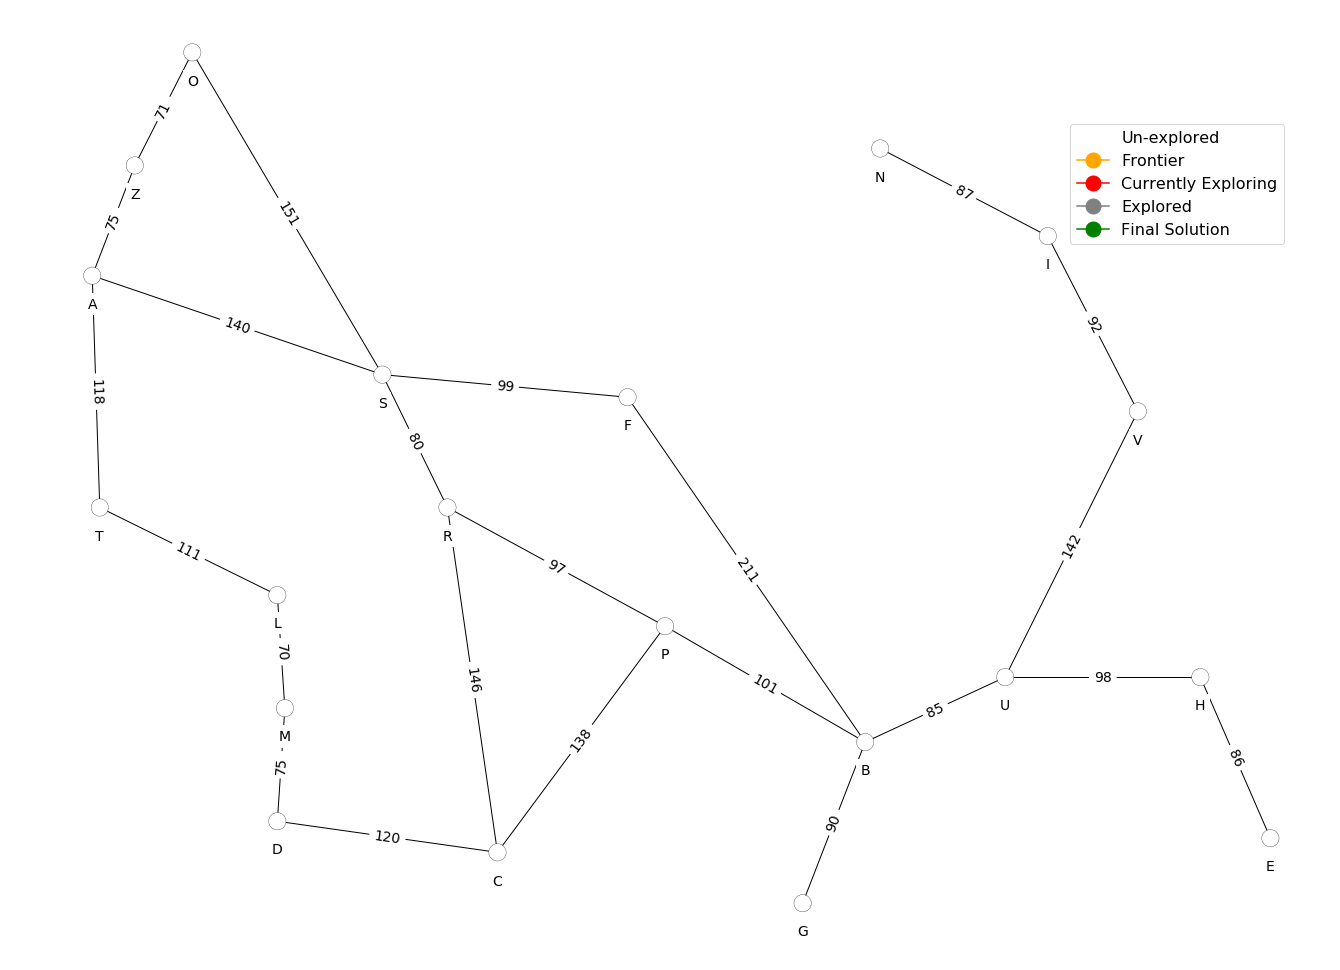

In [15]:
show_map(romania_graph_data)

It is pretty straightforward to understand this `romania_map`. The first node **A** has three neighbours named **Z**, **S**, **T**. Each of these nodes are 75, 140, 118 units apart from **A** respectively. And the same goes with other nodes.

And `romania_map.locations` contains the positions of each of the nodes. We will use the straight line distance (which is different from the one provided in `romania_map`) between two cities in algorithms like A\*-search and Recursive Best First Search.

**Define a problem:**
Now it's time to define our problem. We will define it by passing `initial`, `goal`, `graph` to `GraphProblem`. So, our problem is to find the goal state starting from the given initial state on the provided graph. 

Say we want to start exploring from **A** and try to find **B** in our romania_map. So, this is how we do it.

## Create an instance of it

In [ ]:
my_problem = HelloProblem(initial_state='')

## Solve the problem
Including a viewer is handy to see how the algorithm goes about solving the problem.  For large search spaces this can take a very long time, so small examples and or efficeint algorithms are recommended. 

In [ ]:
from simpleai.search.viewers import WebViewer

In [ ]:
result = astar(my_problem, viewer=WebViewer())

## What to expect

```
Running on http://0.0.0.0:8000/ (Press CTRL+C to quit)`

Starting the WebViewer, access it from your web browser, navigating to the address:
http://localhost:8000
To stop the WebViewer, use the "Stop running" link (on the viewer site, from the browser)

127.0.0.1 - - [19/May/2018 15:42:21] "GET / HTTP/1.1" 200 -
...
```

## Visualizing the search

Open the `http://0.0.0.0:8000` page in your browser to see the visualization.  Then, get an understanding of the visualation by reading through brief documentation.  Next, start driving the web application forward using the menu in the upper left corner.  